[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [48]:
import pandas as pd

# Read the data

In [49]:
df = pd.read_csv('athlete_events.csv')

### Don't forget to drop duplicates first

In [50]:
df = df.drop_duplicates(ignore_index=True)
df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
269726  135569                Andrzej ya   M  29.0   179.0    89.0   
269727  135570                  Piotr ya   M  27.0   176.0    59.0   
269728  135570                  Piotr ya   M  27.0   176.0    59.0   
269729  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
269730  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
269726        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
269727          Poland  POL  2014 Winter  2014  Winter           Sochi   
269728          Poland  POL  2014 Winter  2014  Winter           Sochi   
269729          Poland  POL  1998 Winter  1998  Winter          Nagano   
269730          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
269726           Luge                Luge Mixed (Men)'s Doubles   NaN  
269727    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
269728    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
269729      Bobsleigh                      Bobsleigh Men's Four   NaN  
269730      Bobsleigh                      Bobsleigh Men's Four   NaN  

[269731 rows x 15 columns]

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [51]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females

In [52]:
print('Number of Males: ',(df['Sex']=='M').sum())
print('Number of Females: ',(df['Sex']=='F').sum())

Number of Males:  195353
Number of Females:  74378


### How many cities do we have and what are they ?

In [53]:
print('We have',df['City'].nunique(), 'city, and they are:\n')
print(df['City'].unique())

We have 42 city, and they are:

['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [54]:
df.groupby('Year')['Name'].count()

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: Name, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [55]:
df.mode()[['ID', 'Name']]

ID                      Name
0  106296  Heikki Ilmari Savolainen

# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this 
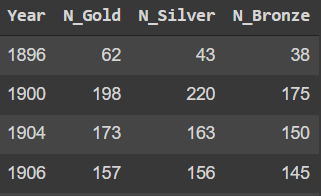

In [66]:
medals_df = pd.get_dummies(df.Medal)
new_df = pd.concat([df, medals_df], axis=1)
new_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']]

Gold  Silver  Bronze
Year                      
1896    62      43      38
1900   198     220     175
1904   173     163     150
1906   157     156     145
1908   294     281     256
1912   326     315     300
1920   493     448     367
1924   332     319     311
1928   275     267     281
1932   261     246     232
1936   348     347     330
1948   330     332     325
1952   351     335     347
1956   353     342     348
1960   359     342     357
1964   408     406     401
1968   425     410     421
1972   474     455     485
1976   508     505     518
1980   529     531     542
1984   571     551     576
1988   607     601     637
1992   663     657     710
1994   110     109     112
1996   608     605     629
1998   145     145     150
2000   663     661     680
2002   162     157     159
2004   664     660     677
2006   176     175     175
2008   671     667     710
2010   174     175     171
2012   632     630     679
2014   202     197     198
2016   665     655     703

# <font color='red'>**You are Geek!**</fond>

### What is the number of winners with the gold medal in each city?

In [85]:
new_df.groupby(['City']).sum()['Gold']

City
Albertville                104
Amsterdam                  245
Antwerpen                  493
Athina                     883
Atlanta                    608
Barcelona                  559
Beijing                    671
Berlin                     312
Calgary                     87
Chamonix                    55
Cortina d'Ampezzo           51
Garmisch-Partenkirchen      36
Grenoble                    66
Helsinki                   306
Innsbruck                  131
Lake Placid                104
Lillehammer                110
London                    1215
Los Angeles                726
Melbourne                  290
Mexico City                359
Montreal                   438
Moskva                     457
Munich                     404
Nagano                     145
Oslo                        45
Paris                      475
Rio de Janeiro             665
Roma                       309
Salt Lake City             162
Sankt Moritz                71
Sapporo                     70
Sar

### Find the total missing data for each year?

In [101]:
df.groupby('Year').count().rsub(df.groupby('Year').size(), axis=0)

ID  Name  Sex   Age  Height  Weight  Team  NOC  Games  Season  City  \
Year                                                                        
1896   0     0    0   163     334     331     0    0      0       0     0   
1900   0     0    0   770    1782    1819     0    0      0       0     0   
1904   0     0    0   274    1088    1154     0    0      0       0     0   
1906   0     0    0   743    1476    1528     0    0      0       0     0   
1908   0     0    0   637    2595    2587     0    0      0       0     0   
1912   0     0    0   156    3319    3444     0    0      0       0     0   
1920   0     0    0   845    3525    3821     0    0      0       0     0   
1924   0     0    0  1103    4602    4881     0    0      0       0     0   
1928   0     0    0   924    4264    4521     0    0      0       0     0   
1932   0     0    0   305    1624    2301     0    0      0       0     0   
1936   0     0    0   199    5954    6159     0    0      0       0     0   
1948   0     0    0  1166    6214    6232     0    0      0       0     0   
1952   0     0    0   277    7170    7171     0    0      0       0     0   
1956   0     0    0   638    3748    3754     0    0      0       0     0   
1960   0     0    0   221     961    1048     0    0      0       0     0   
1964   0     0    0    56     681     708     0    0      0       0     0   
1968   0     0    0   118     153     169     0    0      0       0     0   
1972   0     0    0    96     301     389     0    0      0       0     0   
1976   0     0    0    52     876     920     0    0      0       0     0   
1980   0     0    0   187     588     596     0    0      0       0     0   
1984   0     0    0   216     598     603     0    0      0       0     0   
1988   0     0    0   110     933     928     0    0      0       0     0   
1992   0     0    0    44    3175    3157     0    0      0       0     0   
1994   0     0    0     2     187     189     0    0      0       0     0   
1996   0     0    0     8    1871    1821     0    0      0       0     0   
1998   0     0    0     2      84      86     0    0      0       0     0   
2000   0     0    0     1     123     126     0    0      0       0     0   
2002   0     0    0     0      29      47     0    0      0       0     0   
2004   0     0    0     0      36      37     0    0      0       0     0   
2006   0     0    0     0       6      16     0    0      0       0     0   
2008   0     0    0     2     151     159     0    0      0       0     0   
2010   0     0    0     0       2      24     0    0      0       0     0   
2012   0     0    0     0     168     360     0    0      0       0     0   
2014   0     0    0     0      20     218     0    0      0       0     0   
2016   0     0    0     0     176     223     0    0      0       0     0   

      Sport  Event  Medal  
Year                       
1896      0      0    237  
1900      0      0   1305  
1904      0      0    815  
1906      0      0   1275  
1908      0      0   2238  
1912      0      0   3099  
1920      0      0   2984  
1924      0      0   4608  
1928      0      0   4415  
1932      0      0   2078  
1936      0      0   6121  
1948      0      0   6396  
1952      0      0   8325  
1956      0      0   5391  
1960      0      0   8177  
1964      0      0   8265  
1968      0      0   9223  
1972      0      0  10545  
1976      0      0   8971  
1980      0      0   7335  
1984      0      0   9890  
1988      0      0  12831  
1992      0      0  14383  
1994      0      0   2829  
1996      0      0  11938  
1998      0      0   3165  
2000      0      0  11817  
2002      0      0   3631  
2004      0      0  11442  
2006      0      0   3856  
2008      0      0  11554  
2010      0      0   3882  
2012      0      0  10979  
2014      0      0   4294  
2016      0      0  11665